<a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://user-images.githubusercontent.com/26833433/82952157-51b7db00-9f5d-11ea-8f4b-dda1ffecf992.jpg">

This notebook was written by Ultralytics LLC, and is freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov5 and https://www.ultralytics.com.

# Setup

Clone repo, install dependencies, `%cd` into `./yolov5` folder and check GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)
%cd yolov5

import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.5.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


# 1. Inference

Run inference with a pretrained checkpoint on contents of `/inference/images` folder. Models are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='./inference/images/', view_img=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

image 1/2 inference/images/bus.jpg: 416x352 3 persons, 1 buss, Done. (0.009s)
image 2/2 inference/images/zidane.jpg: 288x416 2 persons, 2 ties, Done. (0.009s)
Results saved to /content/yolov5/inference/output
Done. (0.100s)


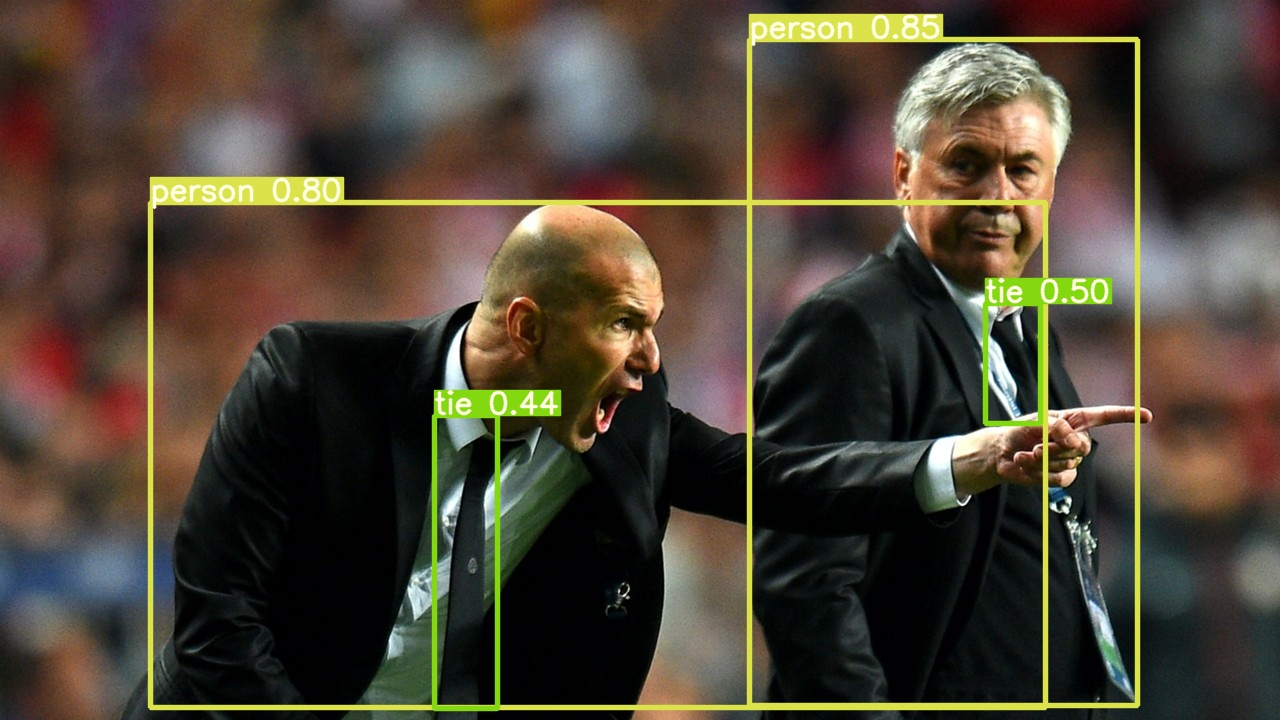

In [ ]:
!python detect.py --weights yolov5s.pt --img 416 --conf 0.4 --source inference/images/
Image(filename='inference/output/zidane.jpg', width=600)

Inference can be run on a variety of sources: images, videos, directories, webcams, rtsp and http streams as shown in the example below.

In [ ]:
# Example syntax (do not run cell)
!python detect.py --source file.jpg  # image 
                           file.mp4  # video
                           dir/  # directory
                           0  # webcam
                           'rtsp://170.93.143.139/rtplive/470011e600ef003a004ee33696235daa' # rtsp
                           'http://112.50.243.8/PLTV/88888888/224/3221225900/1.m3u8'  # http

# 2. Test
Test a model on COCO val or test-dev dataset to determine trained accuracy. Models are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J). To show results by class use the `--verbose` flag. Note that `pycocotools` metrics may be 1-2% better than the equivalent repo metrics, as is visible below, due to slight differences in mAP computation.

### 2.1 val2017
Download COCO val 2017 dataset, 1GB, 5000 images, and test model accuracy.

In [ ]:
# Download COCO val2017
gdrive_download('1Y6Kou6kEB0ZEMCCpJSKStCor4KAReE43','coco2017val.zip')  # val2017 dataset
!mv ./coco ../  # move folder alongside /yolov5

In [ ]:
# Run YOLOv5x on COCO val2017
!python eval.py --weights yolov5x.pt --data coco.yaml --img 672

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/coco.yaml', device='', img_size=672, iou_thres=0.65, merge=False, save_json=True, single_cls=False, task='val', verbose=False, weights=['yolov5x.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Fusing layers... Model Summary: 284 layers, 8.89222e+07 parameters, 8.89222e+07 gradients
Scanning labels ../coco/labels/val2017.cache (4952 found, 0 missing, 48 empty, 0 duplicate, for 5000 images): 100% 5000/5000 [00:00<00:00, 22899.17it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 157/157 [02:38<00:00,  1.01s/it]
                 all       5e+03    3.63e+04       0.426       0.746        0.66       0.469
Speed: 22.3/1.7/24.0 ms inference/NMS/total per 672x672 image at batch-size 32

COCO mAP with pycocotools... saving detections_val2017__results.json...
loading annotations into memory...
Done (t=0.41s)
creating index...
index cre

### 2.2 test-dev2017
Download COCO test2017 dataset, 7GB, 40,000 images, to test model accuracy on test-dev set, 20,000 images. Results are saved to a `*.json` file which can be submitted to the evaluation server at https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
gdrive_download('1cXZR_ckHki6nddOmcysCuuJFM--T-Q6L','coco2017labels.zip')  # annotations
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
!mv ./test2017 ./coco/images && mv ./coco ../  # move images into /coco and move /coco alongside /yolov5

In [ ]:
# Run YOLOv5s on COCO test-dev2017 with argument --task test
!python eval.py --weights yolov5s.pt --data ./data/coco.yaml --task test

# 3. Train

Download https://www.kaggle.com/ultralytics/coco128, a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (actual training is much longer, around **300-1000 epochs**, depending on your dataset).

In [ ]:
# Download coco128
gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f','coco128.zip')  # coco128 dataset
!mv ./coco128 ../  # move folder alongside /yolov5

Train a YOLOv5s model on coco128 by specifying model config file `--cfg models/yolo5s.yaml`, and dataset config file `--data data/coco128.yaml`. Start training from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights ''`. Pretrained weights are auto-downloaded from [Google Drive](https://drive.google.com/open?id=1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

**All training results are saved to `runs/exp0`** for the first experiment, then `runs/exp1`, `runs/exp2` etc. for subsequent experiments.


In [ ]:
# Start tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
# Train YOLOv5s on coco128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --cfg yolov5s.yaml --weights yolov5s.pt --nosave --cache

Namespace(batch_size=16, bucket='', cache_images=True, cfg='./models/yolov5s.yaml', data='./data/coco128.yaml', device='', epochs=3, evolve=False, hyp='', img_size=[640], multi_scale=False, name='', noautoanchor=False, nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='yolov5s.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-07-11 20:37:09.422496: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Hyperparameters {'optimizer': 'SGD', 'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}

                 from  n    params  module                 

# 4. Visualize

View `runs/exp0/train*.jpg` images to see training images, labels and augmentation effects. A **Mosaic Dataloader** is used for training (shown below), a new concept developed by Ultralytics and first featured in [YOLOv4](https://arxiv.org/abs/2004.10934).

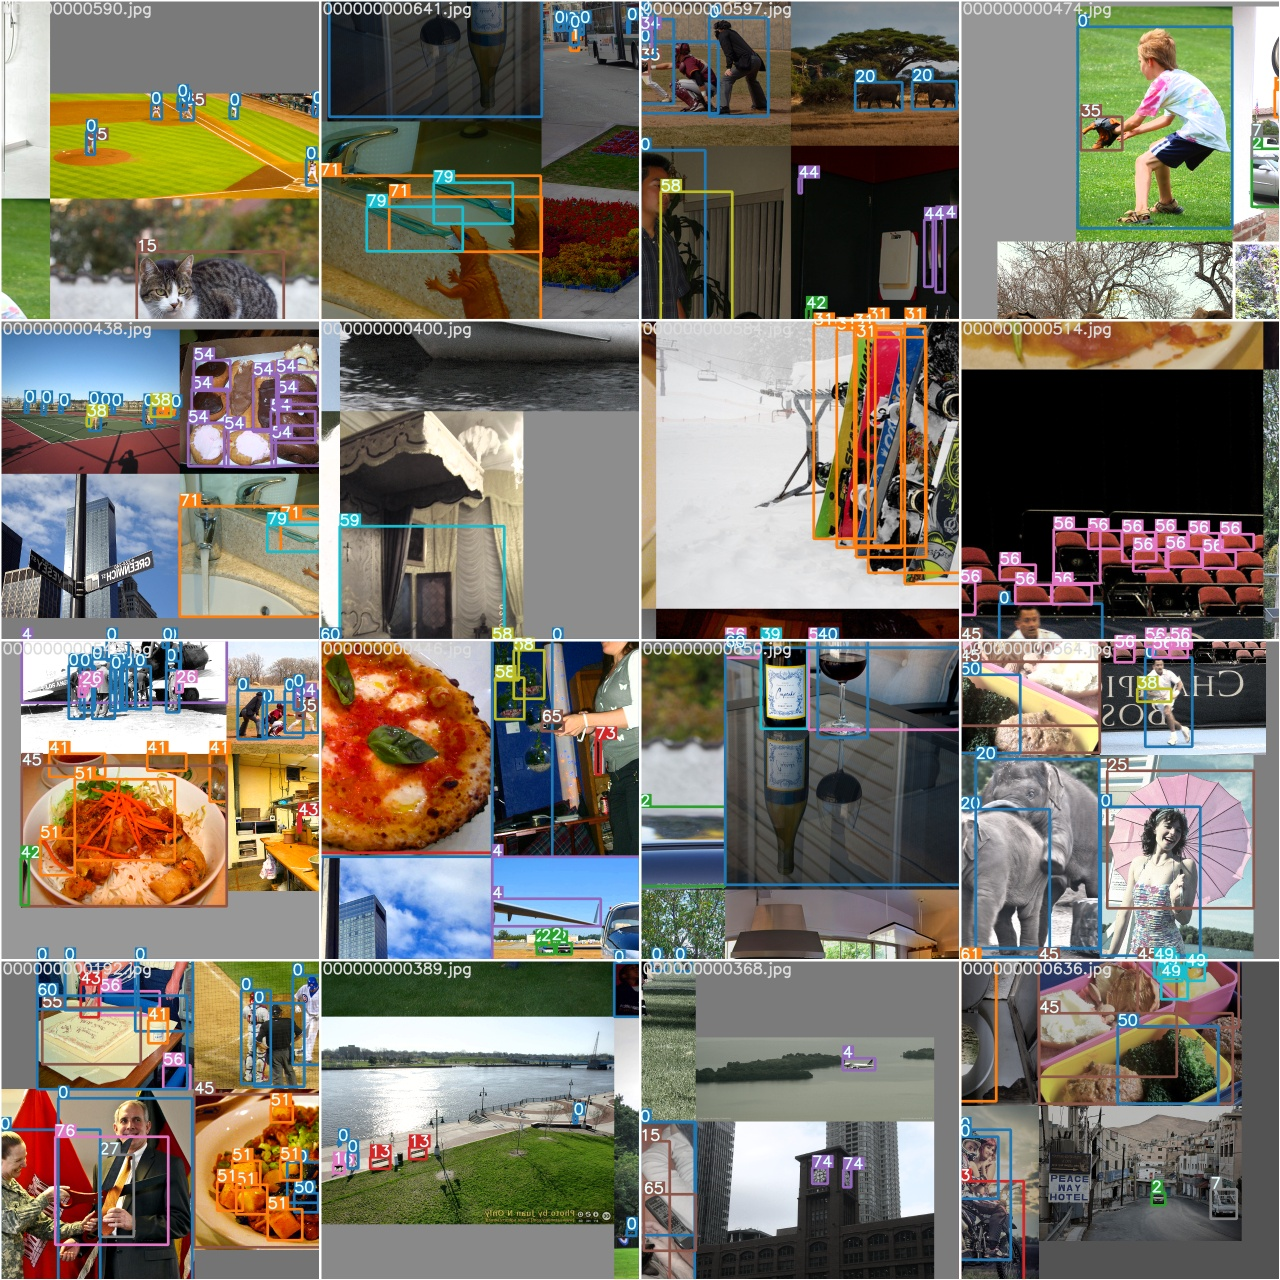

In [ ]:
Image(filename='runs/exp0/train_batch1.jpg', width=900)  # view augmented training mosaics

View `test_batch0_gt.jpg` to see test batch 0 *ground truth* labels.

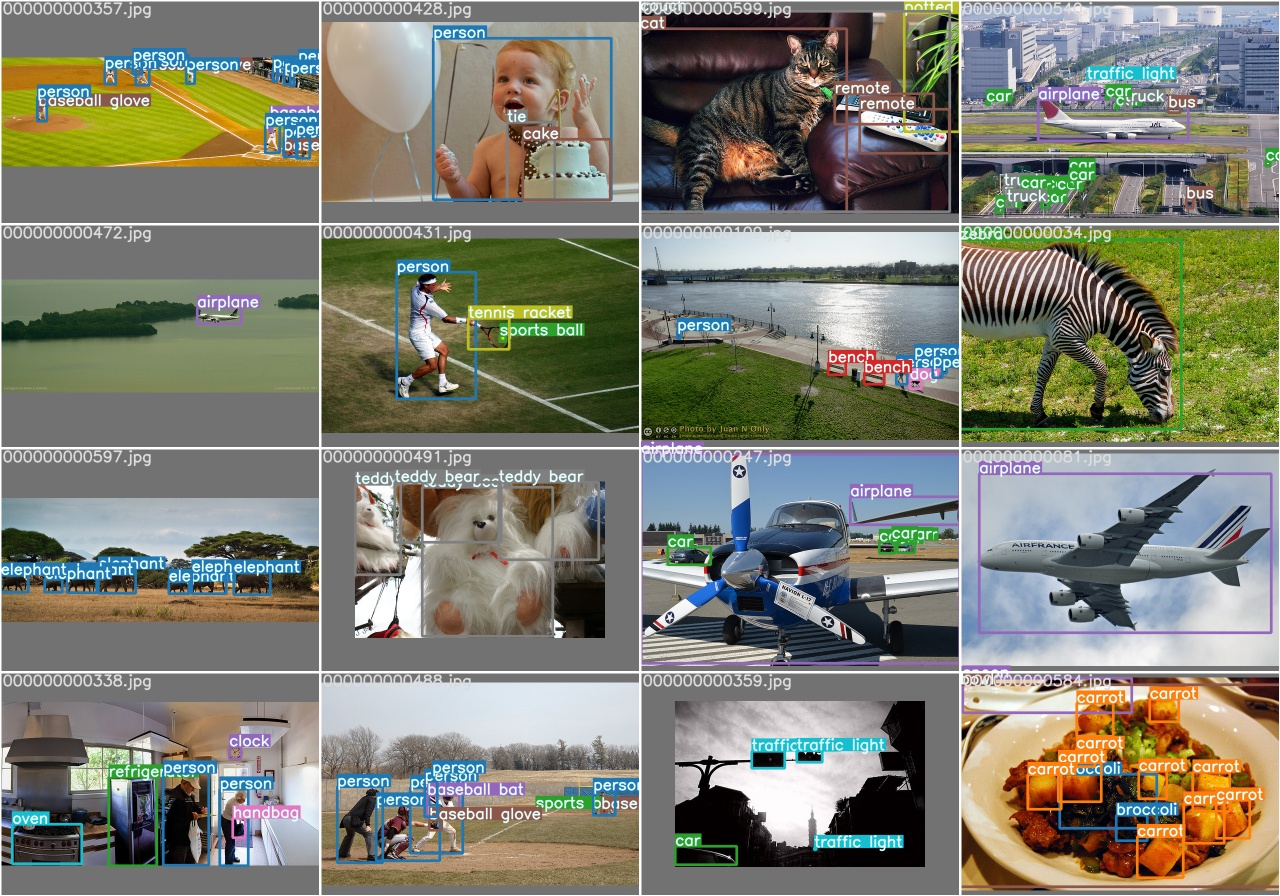

In [ ]:
Image(filename='runs/exp0/test_batch0_gt.jpg', width=900)  # view test image labels

View `test_batch0_pred.jpg` to see test batch 0 *predictions*.

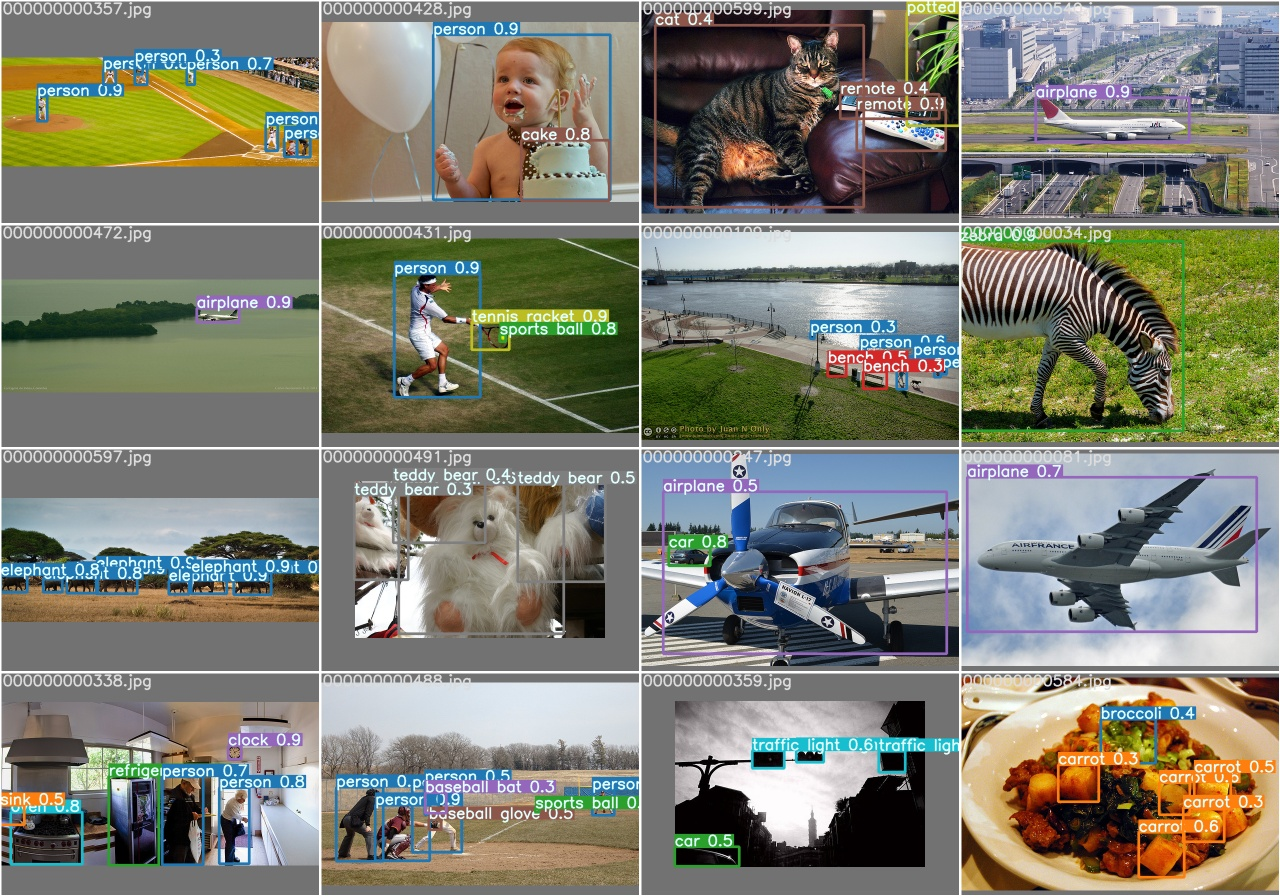

In [ ]:
Image(filename='runs/exp0/test_batch0_pred.jpg', width=900)  # view test image predictions

Training losses and performance metrics are saved to Tensorboard and also to a `runs/exp0/results.txt` logfile. `results.txt` is plotted as `results.png` after training completes. Partially completed `results.txt` files can be plotted with `from utils.utils import plot_results; plot_results()`. Here we show YOLOv5s trained on coco128 to 300 epochs, starting from scratch (blue), and from pretrained `yolov5s.pt` (orange).

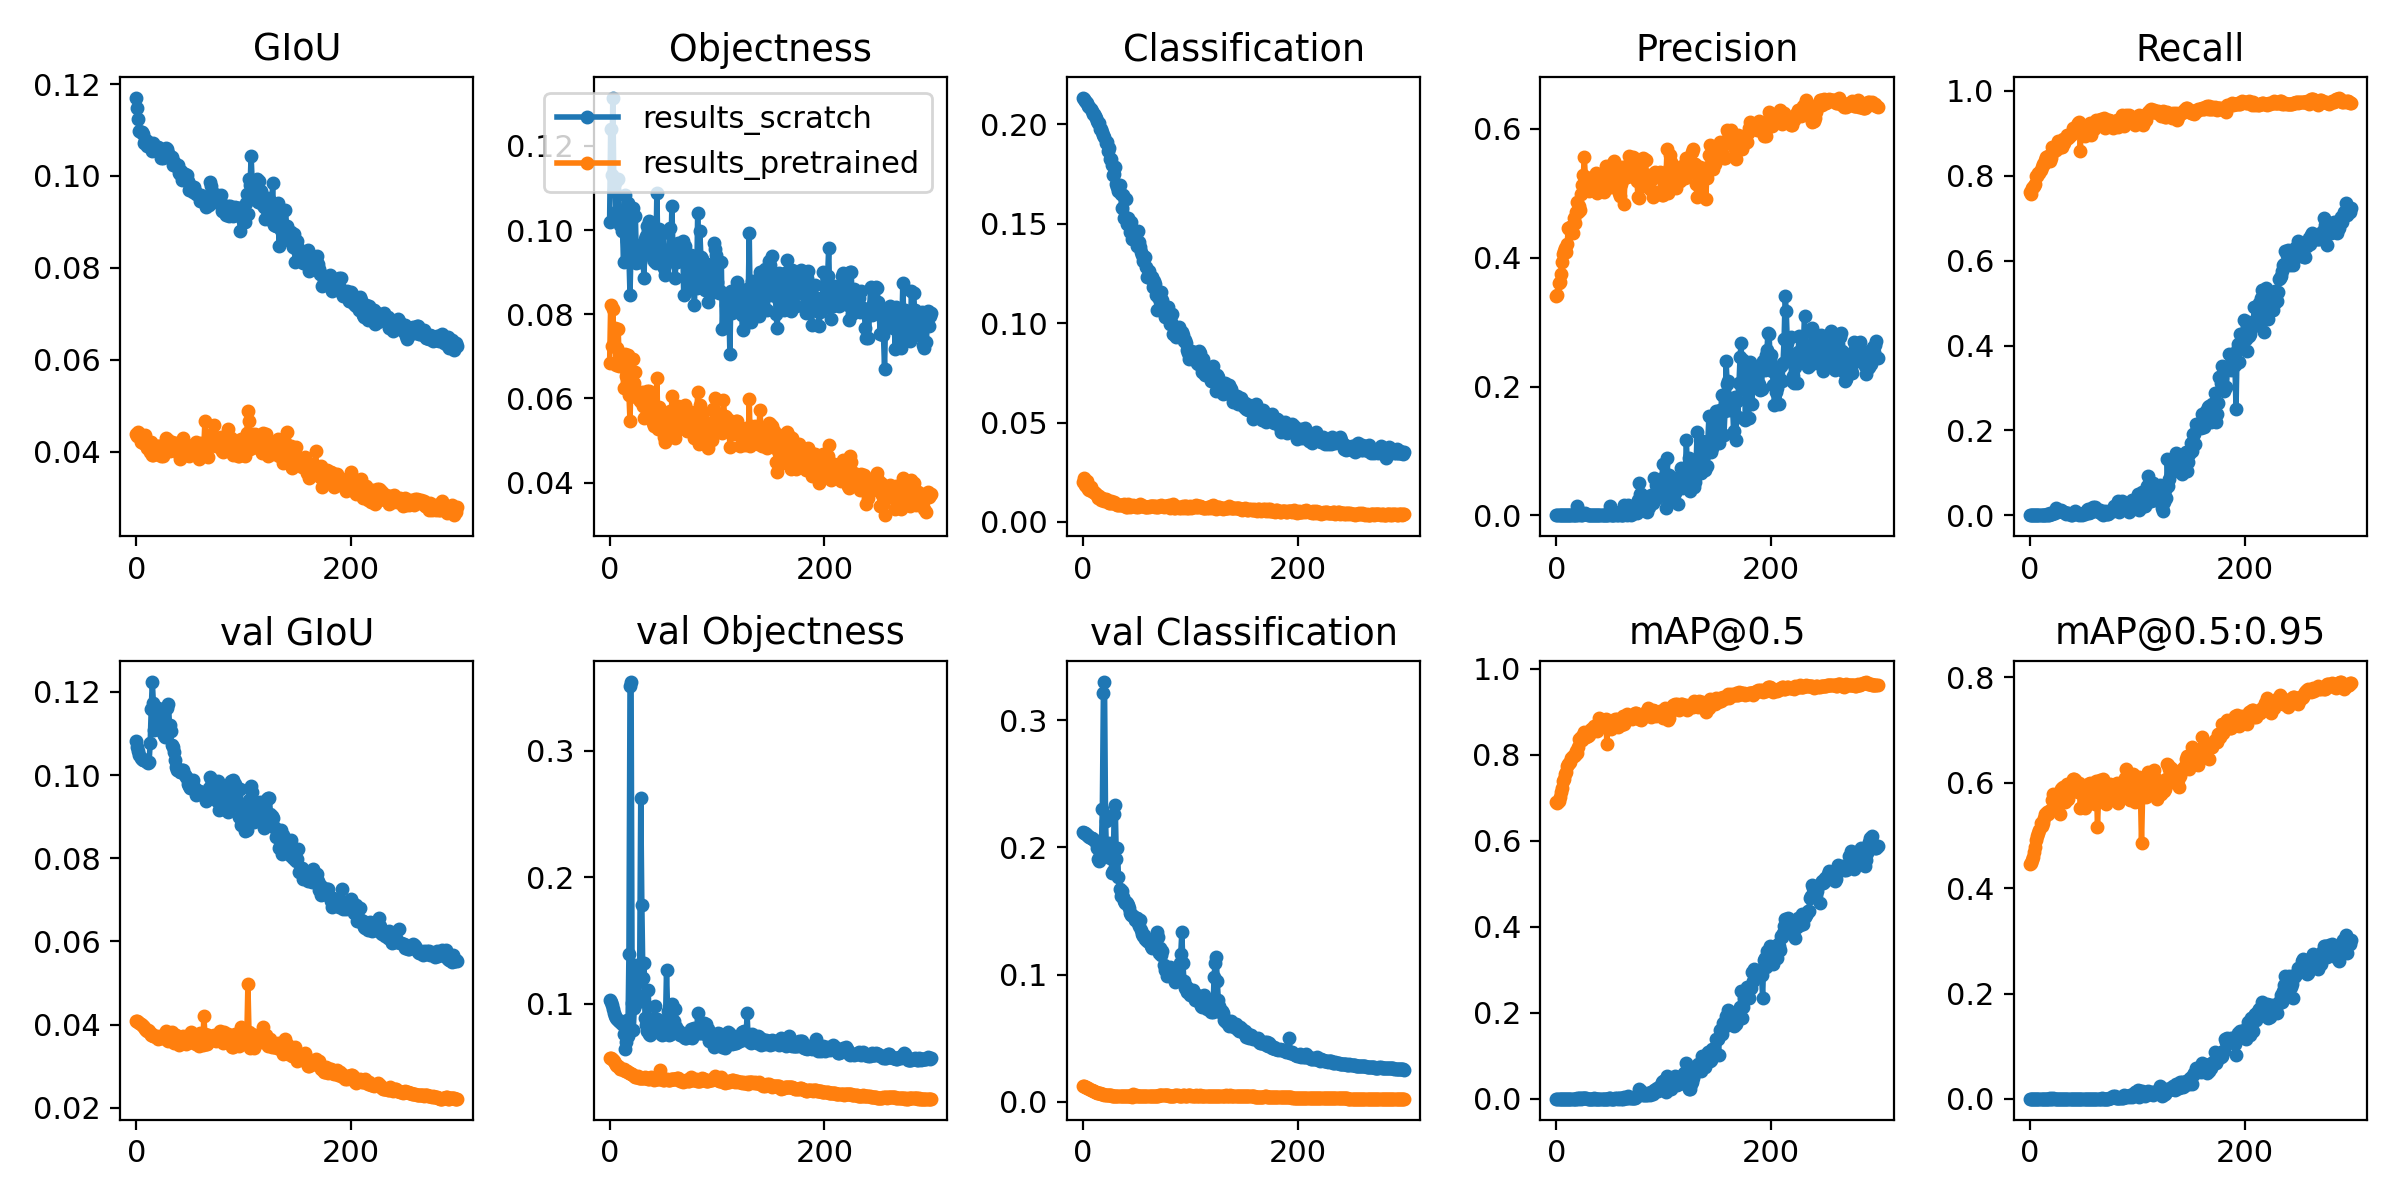

In [ ]:
from utils.utils import plot_results; plot_results()  # plot results.txt files as results.png

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including CUDA/CUDNN, Python and PyTorch preinstalled):

- **Google Colab Notebook** with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
- **Kaggle Notebook** with free GPU: [https://www.kaggle.com/ultralytics/yolov5](https://www.kaggle.com/ultralytics/yolov5)
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart) 
- **Docker Image** https://hub.docker.com/r/ultralytics/yolov5. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) ![Docker Pulls](https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker)

# Appendix

Optional extras below. Unit tests validate repo functionality and should be run on any PRs submitted.


In [ ]:
# Re-clone repo
%cd ..
!rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5
%cd yolov5

In [ ]:
# Test GCP ckpt
%%shell
for x in best*
do
  gsutil cp gs://*/*/*/$x.pt .
  python eval.py --weights $x.pt --data coco.yaml --img 672
done

In [ ]:
# YOLOv5 unit tests
%%shell
cd .. && rm -rf yolov5 && git clone https://github.com/ultralytics/yolov5 && cd yolov5
export PYTHONPATH="$PWD" # to run *.py. files in subdirectories
pip install -qr requirements.txt onnx
python3 -c "from utils.google_utils import *; gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f', 'coco128.zip')" && mv ./coco128 ../
for x in yolov5s #yolov5m yolov5l yolov5x # models
do
  python train.py --weights $x.pt --cfg $x.yaml --epochs 4 --img 320 --device 0  # train
  for di in 0 cpu # inference devices
  do
    python detect.py --weights $x.pt --device $di  # detect official
    python detect.py --weights runs/exp0/weights/last.pt --device $di  # detect custom
    python eval.py --weights $x.pt --device $di # test official
    python eval.py --weights runs/exp0/weights/last.pt --device $di # test custom
  done
  python models/yolo.py --cfg $x.yaml # inspect
  python models/export.py --weights $x.pt --img 640 --batch 1 # export
done